## Overview

### Indian Energy Exchange Data 

In the day-ahead market which is basically a financial market, customers can sell or buy energy for the next 24 hours in a closed auction

India has been divided into 13 regions for financial bidding 

Some terminologies

MCP - Market Clearing Price: The price where demand is equal to the supply

Shortage : Supply < Demand when a price falls below MCP

Excess : Supply > Demand when a price goes above MCP





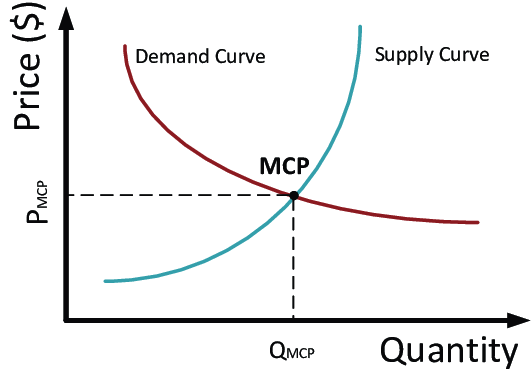

The dataset contains area prices of the day ahead market over the last 8 days (15 minute time interval)
India has been divided into 13 areas :

1. 	N1 - 	North Region -	Jammu and Kashmir, Himachal Pradesh, Chandigarh, Haryana
2. 	N2 -	North Region -	Uttar Pradesh , Uttaranchal, Rajasthan, Delhi
3. 	N3 -	North Region -	Punjab
4. 	E1 -	East Region -	West Bengal, Sikkim, Bihar, Jharkhand
5. 	E2 -	East Region -	Orissa
6. 	W1 -	West Region -	Madhaya Pradesh
7. 	W2 -	West Region -	Maharashtra, Gujarat, Daman and Diu, Dadar and Nagar Haveli, North Goa
8. 	W3 -	West Region -	Chhattisgarh
9. 	S1 -	South Region -	Andhra Pradesh, Telangana, Karnataka, Pondicherry (Yanam), South Goa
10. S2 -	South Region -	Tamil Nadu, Pondicherry (Puducherry), Pondicherry (Karaikal), Pondicherry (Mahe)
11. S3 -	South Region -	Kerala
12. A1 -	North East Region -	Tripura, Manipur, Mizoram, Nagaland
13. A2 -	North East Region -	Assam, Arunachal Pradesh, Meghalaya

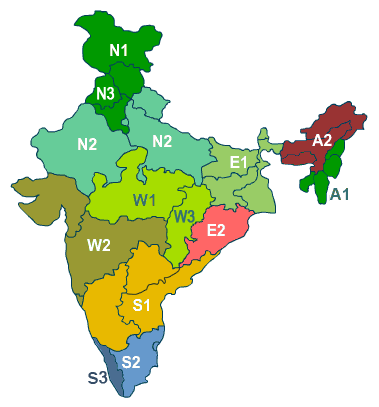

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
df = pd.read_excel (r'C:/Users/Ayushmaan Khalkho/Desktop/UML assignment/DA INTERN ASSIGNMENT/PriceMinute.xlsx', sheet_name='PriceMinute')
#Import appropriate libraries and excel file

### Data Cleaning

We will be dealing with NaNs and be doing some basic feature engineering

In [33]:
df.rename(columns={'Date | Hour | Time Block': 'Date', 'Unnamed: 1': 'Hour', 'Unnamed: 2': 'Time'}, inplace=True)
#Rename columns for easier understanding

In [34]:
df=df.iloc[:768,]
#Taking rows from 0 to 768 for leaving out the rest of the part consisiting of summary statistics for 8 days 

In [35]:
df
#Simply displaying

,Date,Hour,Time,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
0,15-10-2020,1,00:00 - 00:15,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66
1,NaN,NaN,00:15 - 00:30,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92
2,NaN,NaN,00:30 - 00:45,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98
3,NaN,NaN,00:45 - 01:00,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52
4,NaN,2,01:00 - 01:15,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,NaN,NaN,22:45 - 23:00,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94
764,NaN,24,23:00 - 23:15,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01
765,NaN,NaN,23:15 - 23:30,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06
766,NaN,NaN,23:30 - 23:45,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40


In [36]:
df = df.replace(np.nan, '', regex=True)
#df.head(100)
#Replacing NaNs with blank spaces

In [37]:
df
#Redisplaying for the desired resultant dataframe

,Date,Hour,Time,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
0,15-10-2020,1,00:00 - 00:15,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66,2510.66
1,,,00:15 - 00:30,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92,2596.92
2,,,00:30 - 00:45,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98,2590.98
3,,,00:45 - 01:00,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52,2558.52
4,,2,01:00 - 01:15,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84,2500.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,,,22:45 - 23:00,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94,2709.94
764,,24,23:00 - 23:15,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01,2649.01
765,,,23:15 - 23:30,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06,2463.06
766,,,23:30 - 23:45,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40,2600.40


In [38]:
df.A1 = pd.to_numeric(df.A1, errors='coerce').fillna(0).astype(np.float64) 
df.A2 = pd.to_numeric(df.A2, errors='coerce').fillna(0).astype(np.float64) 
df.E1 = pd.to_numeric(df.E1, errors='coerce').fillna(0).astype(np.float64) 
df.E2 = pd.to_numeric(df.E2, errors='coerce').fillna(0).astype(np.float64) 
df.N1 = pd.to_numeric(df.N1, errors='coerce').fillna(0).astype(np.float64) 
df.N2 = pd.to_numeric(df.N2, errors='coerce').fillna(0).astype(np.float64) 
df.N3 = pd.to_numeric(df.N3, errors='coerce').fillna(0).astype(np.float64) 
df.S1 = pd.to_numeric(df.S1, errors='coerce').fillna(0).astype(np.float64) 
df.S2 = pd.to_numeric(df.S2, errors='coerce').fillna(0).astype(np.float64) 
df.S3 = pd.to_numeric(df.S3, errors='coerce').fillna(0).astype(np.float64) 
df.W1 = pd.to_numeric(df.W1, errors='coerce').fillna(0).astype(np.float64) 
df.W2 = pd.to_numeric(df.W2, errors='coerce').fillna(0).astype(np.float64) 
df.W3 = pd.to_numeric(df.W3, errors='coerce').fillna(0).astype(np.float64) 
df.MCP = pd.to_numeric(df.MCP, errors='coerce').fillna(0).astype(np.float64) 
#Changing datatype from object to float so as to perform numerical operations

### Calculating Moving Average

We will now be calculating moving average (simple moving average here)

Short rolling for small window sizes and Long rolling for large window sizes

After that simply ploting these two moving averages in the same plot

SMA is taken along the Column/Area Price 'A1' 

In [39]:
short_rolling = df['A1'].rolling(window=98).mean()
short_rolling.head(100)
#Performing Simple Moving Average on Price A1 on a window of 98 rows i.e. smaller window = Short Rolling Average

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
         ...     
95            NaN
96            NaN
97    2810.611224
98    2811.487653
99    2811.487143
Name: A1, Length: 100, dtype: float64

In [40]:
long_rolling = df['A1'].rolling(window=766).mean()
long_rolling.tail(100)
#Performing Simple Moving Average on on Price A1 on a window of 766 rows i.e. longer window = Long Rolling Average 

668            NaN
669            NaN
670            NaN
671            NaN
672            NaN
          ...     
763            NaN
764            NaN
765    2918.310522
766    2918.427676
767    2918.301645
Name: A1, Length: 100, dtype: float64

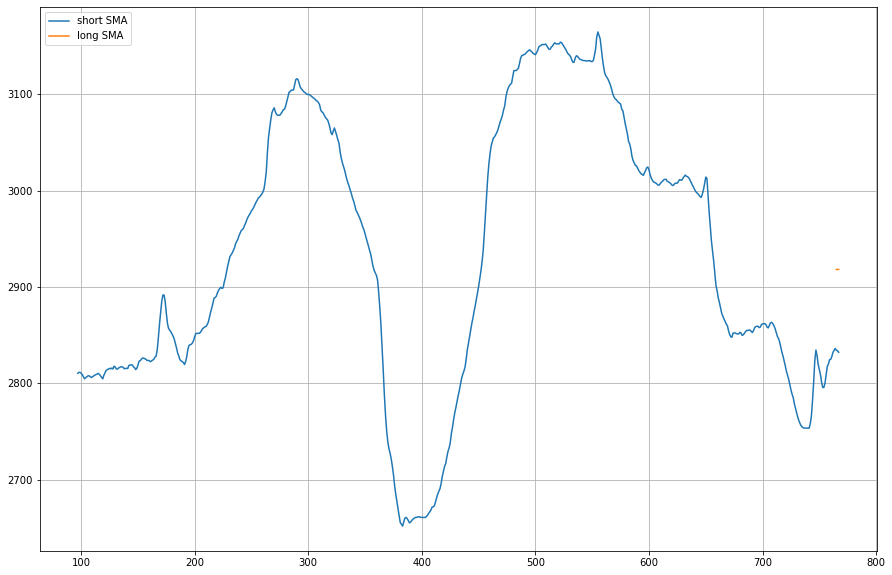

In [41]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(short_rolling,label='short SMA')
plt.plot(long_rolling,label='long SMA')
plt.legend(loc=2)
#Displaying a graph for both the moving averages

### EDA - Bar Charts and Line Charts

We will now plot area price v/s date of the last 8 days for seeing variations and drawing insights

X-axis : Dates 

Y-axis : Area Prices

<AxesSubplot:xlabel='Date', ylabel='Prices'>

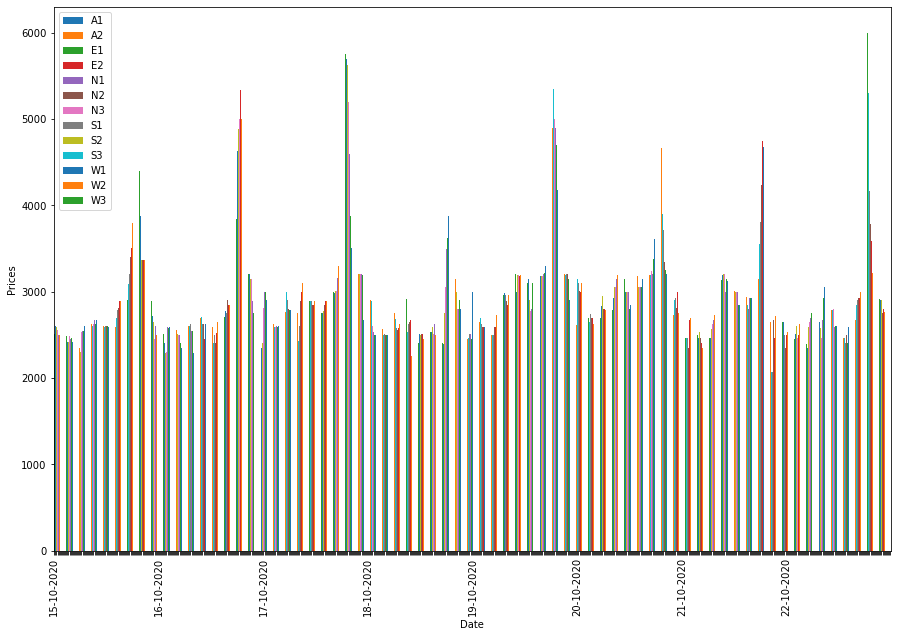

In [42]:
df.plot(x="Date", y=["A1", "A2", "E1","E2","N1","N2","N3","S1","S2","S3","W1","W2","W3"], kind="bar", figsize=(15,10), ylabel="Prices")
#Using pandas for EDA , here: plotting a bar graph 

<AxesSubplot:xlabel='Date', ylabel='Prices'>

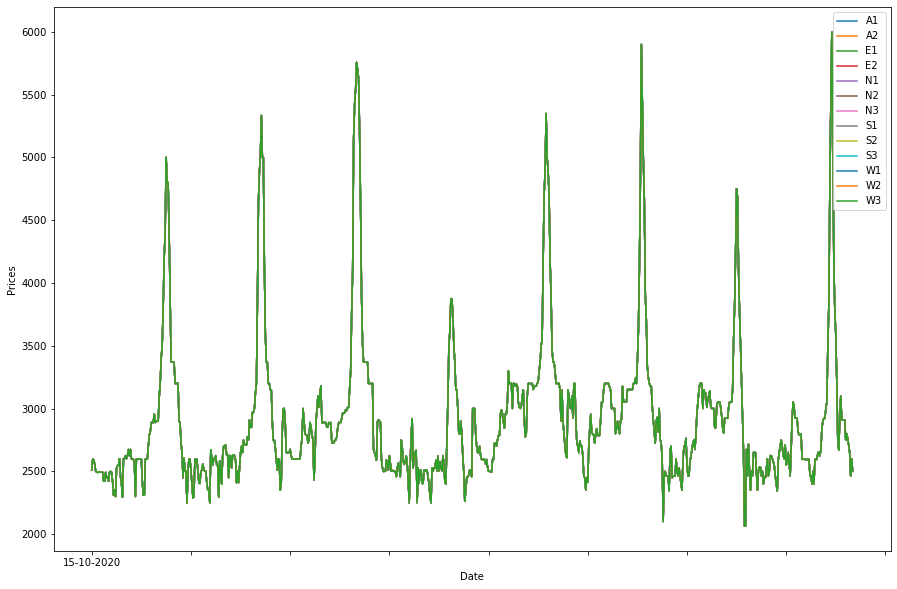

In [43]:
df.plot(x="Date", y=["A1", "A2", "E1","E2","N1","N2","N3","S1","S2","S3","W1","W2","W3"], kind="line", figsize=(15,10), ylabel="Prices")
#Using pandas for EDA , here: plotting a line graph